# Regression Metrics for Continuous Outcomes:

### R-Squared (R2) refers to the proportion of variation in the outcome explained by the predictor variables.
### Adjusted R-Squared compares the descriptive power of regression models.
### Mean Squared Error (MSE) is a popular error metric for regression problems.
### Root Mean Squared Error (RMSE) is an extension of the mean squared error, measuring the average error performed by the model in its predictions. Absolute Error is the difference between measured (or inferred) value and the actual value of a quantity Mean Absolute Error (MAE) measures the prediction error, i.e., the average absolute difference between observed and predicted outcomes.
### Residual Standard Error (RSE) is a variant of the RMSE adjusted for the number of predictors in the model.
### Mean Absolute Deviation (MAD) provides information on the variability of a dataset.
### Maximum Residual Error (MRE)
### Root Relative Squared Error (RRSE) is the root of the squared error of the predictions relative to a naive model predicting the mean.
### Bayesian Information Criteria (BIC) is a criterion for model selection among a finite set of models.
### Mallows’s Cp assesses the fit of a regression model that has been estimated using ordinary least squares.
### Correlation Coefficient measures how strong a relationship between two variables is.

# Classification Metrics for Proper Classification:
### Accuracy Score
### Precession
### Recall
### F1-Score
### Confusion Matrix
### ROC Curve
### AUC Curve

In [ ]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv(r'C:\Users\aruns\Downloads\qsar_aquatic_toxicity (1).csv')

In [5]:
df

,0,0.1,0.2,2.419,1.225,0.667,0.3,0.4,3.74
0,0.00,0.000,0,2.638,1.401,0.632,0,0,4.330
1,9.23,11.000,0,5.799,2.930,0.486,0,0,7.019
2,9.23,11.000,0,5.453,2.887,0.495,0,0,6.723
3,9.23,11.000,0,4.068,2.758,0.695,0,0,5.979
4,215.34,327.629,3,0.189,4.677,1.333,0,4,6.064
...,...,...,...,...,...,...,...,...,...
540,24.06,35.776,2,3.326,2.837,0.849,2,0,4.651
541,9.23,11.000,0,3.275,2.727,0.874,0,0,3.953
542,0.00,0.000,0,5.165,3.111,0.732,0,0,6.219
543,13.14,9.507,0,2.859,2.614,0.827,0,0,4.995


In [6]:
df=pd.read_csv(r'C:\Users\aruns\Downloads\qsar_aquatic_toxicity (1).csv',header=None,names=['TPSA(Tot)','SAacc','H-050','MLOGP','RDCHI','GATS1p',
                                                  'nN','C-040','quantitative response, LC50 [-LOG(mol/L)]'])

In [8]:
df

,TPSA(Tot),SAacc,H-050,MLOGP,RDCHI,GATS1p,nN,C-040,"quantitative response, LC50 [-LOG(mol/L)]"
0,0.00,0.000,0,2.419,1.225,0.667,0,0,3.740
1,0.00,0.000,0,2.638,1.401,0.632,0,0,4.330
2,9.23,11.000,0,5.799,2.930,0.486,0,0,7.019
3,9.23,11.000,0,5.453,2.887,0.495,0,0,6.723
4,9.23,11.000,0,4.068,2.758,0.695,0,0,5.979
...,...,...,...,...,...,...,...,...,...
541,24.06,35.776,2,3.326,2.837,0.849,2,0,4.651
542,9.23,11.000,0,3.275,2.727,0.874,0,0,3.953
543,0.00,0.000,0,5.165,3.111,0.732,0,0,6.219
544,13.14,9.507,0,2.859,2.614,0.827,0,0,4.995


In [9]:
df.isnull().sum()

TPSA(Tot)                                    0
SAacc                                        0
H-050                                        0
MLOGP                                        0
RDCHI                                        0
GATS1p                                       0
nN                                           0
C-040                                        0
quantitative response, LC50 [-LOG(mol/L)]    0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers=df[(df < (Q1 - 1.5 *IQR)) | (df > (Q3 + 1.5 *IQR)) ]
outliers.isnull().sum()

TPSA(Tot)                                    529
SAacc                                        518
H-050                                        493
MLOGP                                        542
RDCHI                                        532
GATS1p                                       539
nN                                           539
C-040                                        412
quantitative response, LC50 [-LOG(mol/L)]    529
dtype: int64

In [13]:
df1=df[~((df < (Q1 - 1.5 *IQR)) | (df > (Q3 + 1.5 *IQR))).any(axis=1)]
df1.shape

(362, 9)

In [14]:
df1.describe()

,TPSA(Tot),SAacc,H-050,MLOGP,RDCHI,GATS1p,nN,C-040,"quantitative response, LC50 [-LOG(mol/L)]"
count,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.0,362.000000
mean,32.913646,34.948807,0.527624,2.639749,2.319315,0.973354,0.718232,0.0,4.752171
std,32.861327,34.696924,0.737263,1.436154,0.587386,0.382539,1.080243,0.0,1.452918
min,0.000000,0.000000,0.000000,-1.222000,1.000000,0.281000,0.000000,0.0,0.673000
25%,0.000000,0.000000,0.000000,1.748250,1.963750,0.676250,0.000000,0.0,3.728750
50%,25.040000,32.897000,0.000000,2.597000,2.224500,0.941500,0.000000,0.0,4.716500
75%,47.057500,53.344750,1.000000,3.555000,2.719000,1.189000,1.000000,0.0,5.639000
max,137.460000,161.259000,2.000000,6.470000,4.026000,2.003000,5.000000,0.0,8.564000


In [45]:
df1

,TPSA(Tot),SAacc,H-050,MLOGP,RDCHI,GATS1p,nN,C-040,"quantitative response, LC50 [-LOG(mol/L)]"
0,0.00,0.000,0,2.419,1.225,0.667,0,0,3.740
1,0.00,0.000,0,2.638,1.401,0.632,0,0,4.330
2,9.23,11.000,0,5.799,2.930,0.486,0,0,7.019
3,9.23,11.000,0,5.453,2.887,0.495,0,0,6.723
4,9.23,11.000,0,4.068,2.758,0.695,0,0,5.979
...,...,...,...,...,...,...,...,...,...
541,24.06,35.776,2,3.326,2.837,0.849,2,0,4.651
542,9.23,11.000,0,3.275,2.727,0.874,0,0,3.953
543,0.00,0.000,0,5.165,3.111,0.732,0,0,6.219
544,13.14,9.507,0,2.859,2.614,0.827,0,0,4.995


In [25]:
x=df1.iloc[:,0:7].values
x

array([[ 0.   ,  0.   ,  0.   , ...,  1.225,  0.667,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  1.401,  0.632,  0.   ],
       [ 9.23 , 11.   ,  0.   , ...,  2.93 ,  0.486,  0.   ],
       ...,
       [ 0.   ,  0.   ,  0.   , ...,  3.111,  0.732,  0.   ],
       [13.14 ,  9.507,  0.   , ...,  2.614,  0.827,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  1.8  ,  0.917,  0.   ]])

In [26]:
y=df1.iloc[:,8].values
y

array([3.74 , 4.33 , 7.019, 6.723, 5.979, 7.337, 4.1  , 3.941, 3.809,
       4.34 , 3.93 , 3.533, 4.632, 0.673, 3.323, 2.272, 7.1  , 5.721,
       5.102, 3.718, 3.577, 6.458, 2.352, 4.838, 6.858, 6.36 , 4.301,
       3.772, 4.179, 3.061, 4.867, 5.373, 3.522, 1.22 , 3.631, 3.725,
       6.   , 6.32 , 2.815, 4.72 , 4.333, 3.87 , 3.115, 6.383, 4.34 ,
       6.064, 6.36 , 3.226, 4.474, 6.848, 3.7  , 5.291, 6.042, 5.548,
       4.608, 6.188, 6.24 , 0.935, 3.25 , 6.102, 6.579, 7.044, 2.838,
       3.351, 3.331, 1.73 , 6.442, 8.564, 8.15 , 8.207, 5.036, 7.483,
       5.562, 4.437, 7.128, 6.13 , 3.481, 7.037, 2.232, 3.392, 4.858,
       6.059, 4.385, 3.298, 2.685, 4.733, 5.47 , 5.9  , 5.551, 6.52 ,
       6.883, 5.942, 2.188, 3.008, 5.79 , 6.756, 4.652, 1.888, 7.699,
       6.618, 7.671, 7.341, 7.012, 6.176, 5.527, 5.636, 5.372, 5.571,
       3.155, 3.594, 5.642, 3.48 , 3.432, 4.011, 3.68 , 6.79 , 4.485,
       5.45 , 4.53 , 4.765, 3.524, 4.14 , 4.317, 4.933, 3.71 , 3.618,
       4.98 , 4.025,

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [28]:
x_train

array([[ 0.48344807, -0.38158075,  0.64898576, ..., -1.14848801,
         0.26551776,  1.16827723],
       [ 0.91052282,  0.80434242, -0.72503878, ...,  0.72611106,
         0.34279164, -0.66710323],
       [-0.36725221,  0.25300845,  0.64898576, ..., -0.67900286,
        -0.00627316, -0.66710323],
       ...,
       [-1.00159304, -1.00400708, -0.72503878, ..., -0.47349869,
         0.52931482, -0.66710323],
       [-0.36725221,  0.25300845,  0.64898576, ..., -0.53030472,
         1.75503855, -0.66710323],
       [ 0.72457912,  0.81444378, -0.72503878, ...,  1.23736535,
        -0.92823057,  0.250587  ]])

In [29]:
x_test

array([[ 0.30189427,  0.6828905 ,  0.64898576,  0.37680234,  1.63333681,
         0.16692694,  1.16827723],
       [-0.58956938, -0.72402567, -0.72503878,  0.76828133,  1.13711941,
        -0.44859955, -0.66710323],
       [-0.36725221,  0.25300845,  0.64898576,  1.7042151 ,  1.22734075,
         0.78778265, -0.66710323],
       [ 0.26708862,  1.51005343,  2.0230103 ,  0.46441576,  0.86478461,
        -0.09154089, -0.66710323],
       [ 0.16800226,  0.99352939,  0.64898576,  0.73560013,  1.34095282,
         0.5266502 , -0.66710323],
       [-0.18569841, -0.03518952,  2.0230103 , -1.69393375, -1.63802235,
         1.05424433,  0.250587  ],
       [ 0.43515915,  0.49049347, -0.72503878, -0.2761262 , -0.32647131,
        -0.02492547,  0.250587  ],
       [-0.42275311, -0.35610647, -0.72503878, -0.81501823, -0.27467757,
         0.715838  , -0.66710323],
       [ 0.10372156,  0.28876078,  2.0230103 , -0.96799403, -0.47349869,
         0.34545626,  0.250587  ],
       [-1.00159304, -1.0040

In [30]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

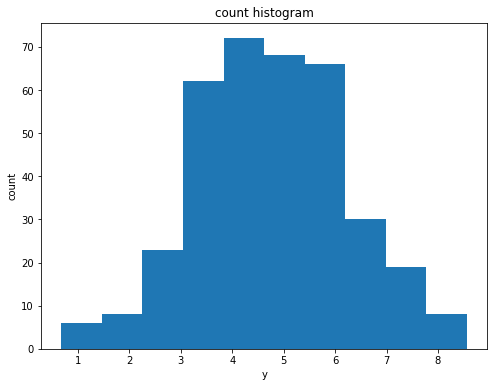

<AxesSubplot:xlabel='quantitative response, LC50 [-LOG(mol/L)]', ylabel='Density'>

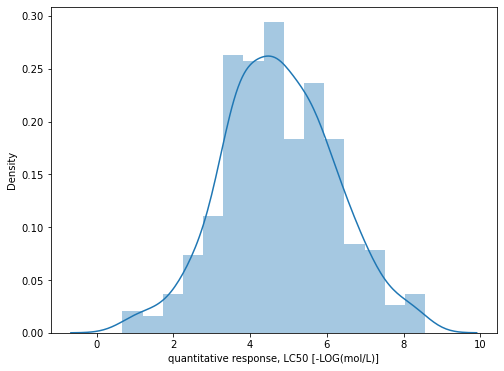

In [31]:

import scipy.stats as stats

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6));
plt.hist(df1['quantitative response, LC50 [-LOG(mol/L)]']);
plt.title('count histogram');
plt.xlabel('y');
plt.ylabel('count');
plt.show();

plt.figure(figsize=(8, 6));
sns.distplot(df1['quantitative response, LC50 [-LOG(mol/L)]'])

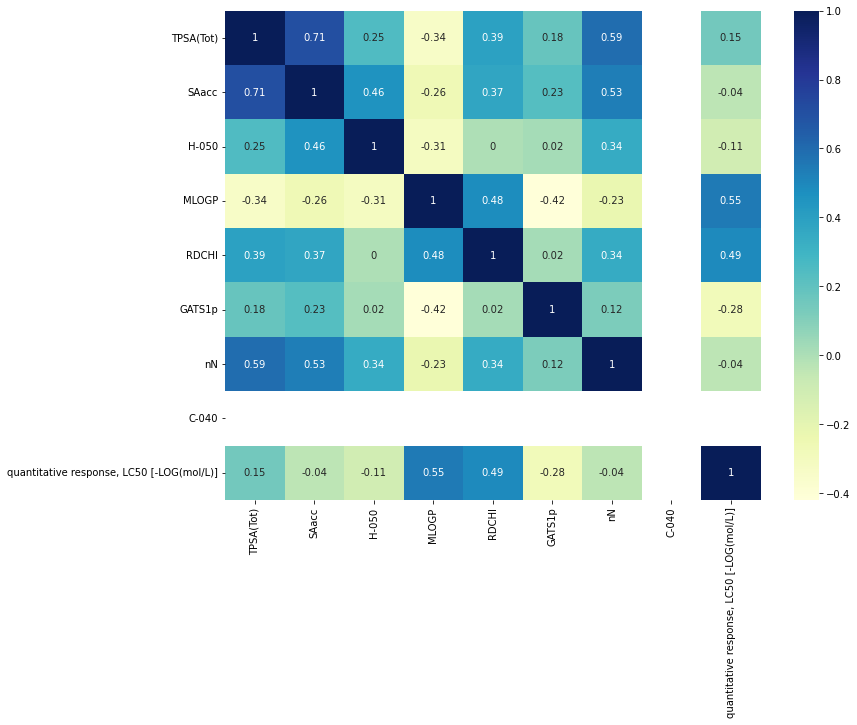

In [32]:
plt.figure(figsize=(12, 9));
correlation_matrix = df1.corr().round(2);
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True);

In [36]:
reg_1 = LinearRegression()
reg_1.fit(x_train, y_train)

y_train_predict_1 = reg_1.predict(x_train)
rmse = (np.sqrt(metrics.mean_squared_error(y_train, y_train_predict_1)))
r2 = round(reg_1.score(x_train, y_train),2)

print(f"The model performance for training set")
print(f"--------------------------------------")
print(f'RMSE is {rmse}')
print(f'R2 score is {r2}') 

The model performance for training set
--------------------------------------
RMSE is 0.999693467134016
R2 score is 0.49


In [38]:
y_pred_1 = reg_1.predict(x_test)
rmse = (np.sqrt(metrics.mean_squared_error(y_test, y_pred_1)))
r2 = round(reg_1.score(x_test, y_test),2)

print(f"The model performance for training set")
print(f"--------------------------------------")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2: {r2}")

The model performance for training set
--------------------------------------
Root Mean Squared Error: 1.1332402218178625
R^2: 0.49


In [39]:
print(f'Coefficient of determination: {metrics.r2_score(y_test, y_pred_1) :.4f}')

Coefficient of determination: 0.4948


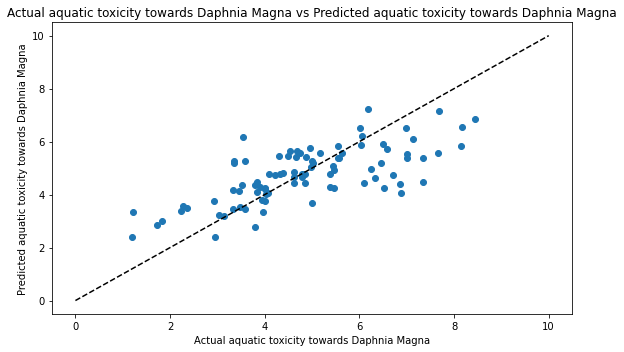

In [49]:
plt.figure(figsize=(8, 5));
plt.scatter(y_test, y_pred_1);
plt.plot([0, 10], [0, 10], '--k');
plt.axis('tight');
plt.xlabel("Actual aquatic toxicity towards Daphnia Magna");
plt.ylabel("Predicted aquatic toxicity towards Daphnia Magna");
#plt.xticks(range(0, int(max(y_test)),2));
#plt.yticks(range(0, int(max(y_test)),2));
plt.title("Actual aquatic toxicity towards Daphnia Magna vs Predicted aquatic toxicity towards Daphnia Magna");
plt.tight_layout();

In [42]:
print("RMS: %r " % np.sqrt(np.mean((y_test - y_pred_1) ** 2)))

RMS: 1.1332402218178625 


In [47]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1})
df3 = df2.head(10)
df3

,Actual,Predicted
0,4.992,5.277079
1,4.737,5.567333
2,6.064,6.212304
3,4.301,5.461121
4,5.170,5.572079
5,3.133,3.183786
6,4.010,4.260516
7,2.937,3.773807
8,4.011,4.205781
9,4.100,4.768373


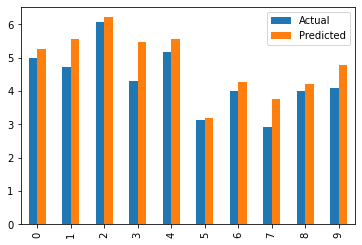

In [50]:
df3.plot(kind='bar');

In [51]:
# import warnings filter
from warnings import simplefilter

# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# importing modules for validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# importing different regression models 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

# user variables to tune
folds   = 10
metric  = "neg_mean_squared_error"

# hold different regression models in a single dictionary
models = dict()
models["Linear"]        = LinearRegression()
models["Lasso"]         = Lasso()
models["ElasticNet"]    = ElasticNet()
models["Ridge"]         = Ridge()
models["BayesianRidge"] = BayesianRidge()
models["KNN"]           = KNeighborsRegressor()
models["DecisionTree"]  = DecisionTreeRegressor()
models["SVR"]           = SVR()
models["AdaBoost"]      = AdaBoostRegressor()
models["GradientBoost"] = GradientBoostingRegressor()
models["RandomForest"]  = RandomForestRegressor()

              Linear: -1.07, 0.37
               Lasso: -1.96, 0.58
          ElasticNet: -1.69, 0.51
               Ridge: -1.07, 0.37
       BayesianRidge: -1.07, 0.37
                 KNN: -1.10, 0.48
        DecisionTree: -1.70, 0.62
                 SVR: -1.02, 0.41
            AdaBoost: -1.11, 0.40
       GradientBoost: -1.12, 0.40
        RandomForest: -1.09, 0.41


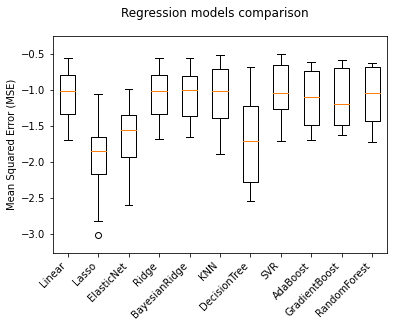

In [52]:
# 10-fold cross validation for each model
model_results = list()
model_names   = list()
for model_name in models:
    model   = models[model_name]
    k_fold  = KFold(n_splits=folds, random_state=None)
    results = cross_val_score(model, x_train, y_train, cv=k_fold, scoring=metric)
    
    model_results.append(results)
    model_names.append(model_name)
    print("{:>20}: {:.2f}, {:.2f}".format(model_name, round(results.mean(), 3), 
                                  round(results.std(), 3)))

# box-whisker plot to compare regression models
figure = plt.figure();
figure.suptitle('Regression models comparison');
ax = figure.add_subplot(111);
plt.boxplot(model_results);
ax.set_xticklabels(model_names, rotation = 45, ha="right");
ax.set_ylabel("Mean Squared Error (MSE)");
plt.margins(0.05, 0.1);
#plt.savefig("model_mse_scores.png")
plt.show();
#plt.clf()
#plt.close()


We have found that Gradiant Boost method has the least rmse so we are going to use that model. Lasso is very bad. 

In [54]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

gbr_predicted = gbr.predict(x_test)
gbr_expected = y_test

In [55]:
print("RMS: %r " % np.sqrt(np.mean((gbr_predicted - gbr_expected) ** 2)))

RMS: 1.0793684373190648 


In [56]:
print('Coeff of determination: {:.4f}'.format(metrics.r2_score(gbr_expected, gbr_predicted)))

Coeff of determination: 0.5417


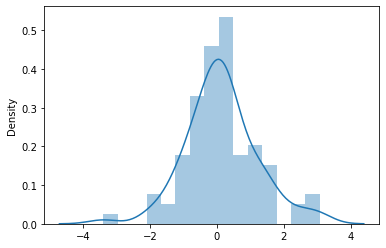

In [57]:
sns.distplot(gbr_expected - gbr_predicted);

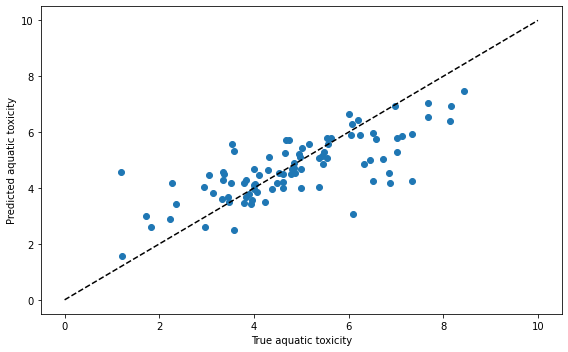

In [58]:
plt.figure(figsize=(8, 5));
plt.scatter(gbr_expected, gbr_predicted)
plt.plot([0, 10], [0, 10], '--k');
plt.axis('tight');
plt.xlabel('True aquatic toxicity');
plt.ylabel('Predicted aquatic toxicity');
plt.tight_layout();

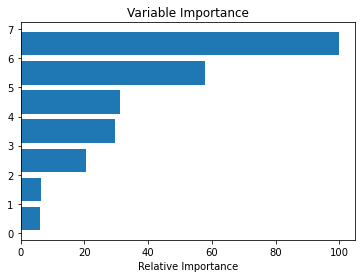

In [62]:
feature_importance = gbr.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

sorted_idx = np.argsort(feature_importance)
pos        = np.arange(sorted_idx.shape[0]) + .5

plt.barh(pos, feature_importance[sorted_idx], align='center');
plt.xlabel('Relative Importance');
plt.title('Variable Importance');

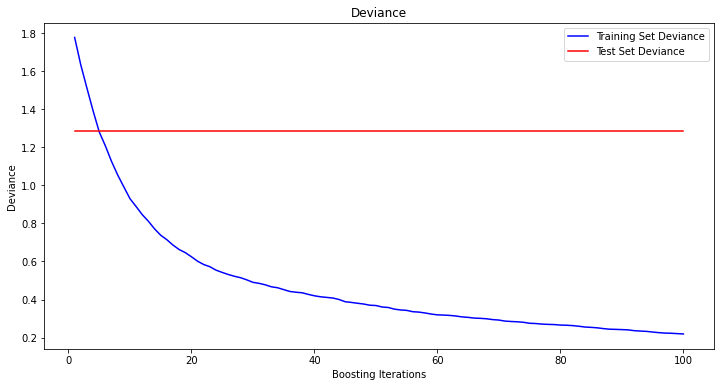

In [63]:
n_estimators = 100
# compute test set deviance
test_score = np.zeros((n_estimators,), dtype=np.float64)

for i, y_pred in enumerate(gbr.staged_predict(x_test)):
    test_score[i] = gbr.loss_(gbr_expected, y_pred_1)

plt.figure(figsize=(12, 6));
plt.subplot(1, 1, 1);
plt.title('Deviance');
plt.plot(np.arange(n_estimators) + 1, 
         gbr.train_score_, 'b-',
         label='Training Set Deviance');
plt.plot(np.arange(n_estimators) + 1, 
         test_score, 'r-',
         label='Test Set Deviance');
plt.legend(loc='upper right');
plt.xlabel('Boosting Iterations');
plt.ylabel('Deviance');